# Data Visualization using Python
#### Muluken Muche
Data visualization is crucial to understand existing patterns, trends, and correlations data by placing the data in a visual context. This data visualization uses several python libraries to showcase available plots and charts to visualize NCSES data. The libraries include  seaborn, matplotlib, bokeh, plotly, ggplot, altair, and geoplotlib as necessary. The purpose is to create a template of figures so that we could use for similar data. Python codes are adopted from several freely available websites. These figures and charts  are based on publicly available NSF-NCSES data.  

### 1) Doctorate Recipients from US Universities, by Broad Field of Study and Sex

The data is downloaded from https://ncses.nsf.gov/pubs/nsf19301/data. The data has selected years of every 5 years (1987 to 2017).

In [ ]:
# Libraries/packages
%matplotlib inline
import os
import sys
import six # Python 2 and 3 compatibility library; provides utility functions for smoothing over differences between versions 
import datetime
import openpyxl
import pygal
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics import mosaicplot
from statsmodels.graphics.mosaicplot import mosaic
import warnings
warnings.filterwarnings("ignore")
sns.set(style="ticks", color_codes=True)
plt.style.use('ggplot')
print( "Necessary packages/libraries are imported at " + str( datetime.datetime.now() ) )

In [ ]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# setting up the HTML with the necessary javascript to display charts 
from IPython.display import display, HTML

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

In [ ]:
# Data loading and reformatting
Tab014 = pd.read_excel('../../Users/muluken/WorkingFiles/NSF_NCSES/Data/Other/sed17-sr-tab014_Edited.xlsx')
Tab014F1 = Tab014[["Field of Study","Sex", "Year", "Number"]]
Tab014_1 = Tab014F1.groupby(['Field of Study','Year']).sum() # Sum of both sex
Tab014_1 = Tab014_1.reset_index()

Tab014F2 = Tab014[["Field of Study","Sex", "Number"]]
Tab014_2 = Tab014F2.groupby(['Field of Study','Sex']).sum() # Sum of all years by sex
Tab014_2 = Tab014_2.reset_index()

Tab014F3 = Tab014[["Field of Study", "Number"]]
Tab014_3 = Tab014F3.groupby(['Field of Study']).sum() # Sum of all years and sex
Tab014_3 = Tab014_3.reset_index()

Tab014_3.head()

#Tab014_1 = Tab014[["Field of Study","Sex", "Year", "Number","Percent"]]

In [ ]:
Tab014.head(50)
# Tab014_1.head()
# Tab014_2.head()
# Tab014_3.head()

#### 1.1)   Box Plots

Note: The third boxplot is interactive, it shows values when clicked.

In [ ]:
sns.catplot(x="Year", y="Number", kind="box",
            data=Tab014).set(title="Number of Doctorate Recipients in 7 Selected Years ");
plt.annotate('Note: Data include 8 major field of studies', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
sns.catplot(x="Year", y="Number", hue="Sex", kind="box",
            data=Tab014).set(title="Number of Doctorate Recipients in 7 Selected Years by Sex )");

plt.annotate('Note: Data include 8 major field of studies', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

In [ ]:
# from pygal.style import DefaultStyle
# dot_chart = pygal.Dot(style=DefaultStyle(
#                     major_font_family='googlefont:Raleway',
#                     major_font_size=30))
box_plot = pygal.Box(human_readable=True,  x_label_rotation=10, legend_at_bottom=True)
box_plot.title = 'Doctrate Reciepents in 7  Selected Years by Major Field of Studies'
box_plot.x_labels = ['1987','1992' ,'1997' ,'2002' ,'2007' ,'2012' ,'2017' ]
box_plot.add('Education', [6453, 6664, 6517, 6495, 6447, 4799, 4821])
box_plot.add('Engineering', [3712, 5366,6065, 5067, 7746, 8452, 9837])
box_plot.add('Humanities & Arts', [3478, 7141, 5248, 5286, 5083, 5559, 5289])
box_plot.add('Life Sciences', [578, 4376, 8365, 8465, 10694, 11949, 12587])
box_plot.add('Mathematics & Computer Science', [1189, 913, 2007, 1723, 3041, 3493, 3842])
box_plot.add('Other', [1876, 2191, 2161, 2127, 2834, 2729, 3112])
box_plot.add('Physical & Earth Sciences', [3811, 4486, 4522, 3871, 4955, 5414, 6079])
box_plot.add('Psychology & Social Sciences', [6063, 6530, 7299,6912,  7306, 8494, 9074])

display(HTML(base_html.format(rendered_chart=box_plot.render(is_unicode=True))))
#box_plot.render()

#### 1.2)  Dot Chart

Note: It is interactive.

In [ ]:
Tab014.head()
#Tab014_1.head(20)
#Tab014_2.head(100)
#Tab014_3.head()

In [ ]:
Tab014_mean = Tab014.groupby(['Field of Study','Year'], as_index=False)[ 'Number'].sum()
Tab014_mean.head()
TT = Tab014_mean.pivot(index = 'Year', columns = 'Field of Study', values = 'Number')
TT.head(10)

In [ ]:
list(zip(*map(TT.get, TT)))

In [ ]:
# from pygal.style import DefaultStyle
# dot_chart = pygal.Dot(style=DefaultStyle(
#                     major_font_family='googlefont:Raleway',
#                     major_font_size=30))
dot_chart = pygal.Dot(human_readable=True,  x_label_rotation=10)
dot_chart.title = 'Doctrate Reciepents in 8 Major Field of Studies by Selected Years'
dot_chart.x_labels = ['Education', 'Engineering', 'Humanities & Arts', 'Life Sciences', 'Mathematics & Computer Science', 'Other', 'Physical & Earth Sciences', 'Psychology & Social Sciences']
dot_chart.add('1987', [6453, 3712, 3478, 5783, 1189, 1876, 3811, 6063])
dot_chart.add('1992', [6664, 5366, 4376, 7141, 913, 2191, 4486, 6530])
dot_chart.add('1997', [6517, 6065, 5248, 8365, 2007, 2161, 4522, 7299])
dot_chart.add('2002', [6495, 5067, 5286, 8465, 1723, 2127, 3871, 6912])
dot_chart.add('2007', [6447, 7746, 5083, 10694, 3041, 2834, 4955, 7306])
dot_chart.add('2012', [4799, 8452, 5559, 11949, 3493, 2729, 5414, 8494])
dot_chart.add('2017', [4821, 9837, 5289, 12587, 3842, 3112, 6079, 9074])
display(HTML(base_html.format(rendered_chart=dot_chart.render(is_unicode=True))))
#dot_chart.render()

#### 1.3)  Radar Chart

Note: It is interactive.

In [ ]:
# !pip install cairosvg


In [ ]:
# radar_chart = pygal.Radar( human_readable=True, legend_at_bottom=True)
# radar_chart.title = 'Field of Study by Year'
# radar_chart.x_labels = ['Education', 'Engineering', 'Humanities & Arts', 'Life Sciences', 'Mathematics & Computer Science', 'Other', 'Physical & Earth Sciences', 'Psychology & Social Sciences']
# radar_chart.add('1987', [6453, 3712, 3478, 578, 1189, 1876, 3811, 6063])
# radar_chart.add('1992', [6664, 5366, 4376, 7141, 913, 2191, 4486, 6530])
# radar_chart.add('1997', [6517, 6065, 5248, 8365, 2007, 2161, 4522, 7299])
# radar_chart.add('2002', [6495, 5067, 5286, 8465, 1723, 2127, 3871, 6912])
# radar_chart.add('2007', [6447, 7746, 5083, 10694, 3041, 2834, 4955, 7306])
# radar_chart.add('2012', [4799, 8452, 5559, 11949, 3493, 2729, 5414, 8494])
# radar_chart.add('2017', [4821, 9837, 5289, 12587, 3842, 3112, 6079, 9074])
# #radar_chart.render()

#### 1.4)  Sunburst Chart

Note: This is interactive chart, details can be seen by clicking on the chart.

In [ ]:
import plotly.express as px
#df = px.data.tips()
fig = px.sunburst(Tab014, path=['Field of Study', 'Year', 'Sex'], values='Number')
fig.update_layout(
    title={
        'text': "Field of Study of Doctrate Recipients by Sex and Selected Years",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

#### 1.5) Stacked Line Chart

In [ ]:
# from pygal.style import Style
# custom_style = Style(
#   background='transparent',
#   plot_background='transparent',
#   foreground='#53E89B',
#   foreground_strong='#53A0E8',
#   foreground_subtle='#630C0D',
#   opacity='.6',
#   opacity_hover='.9',
#   transition='400ms ease-in',
#   colors=('#E853A0', '#E8537A', '#E95355', '#E87653', '#E89B53'))

chart = pygal.StackedLine(fill=True,  human_readable=True, x_label_rotation=10)
chart.title = 'Field of Study by Year'
chart.x_labels = ['Education', 'Engineering', 'Humanities & Arts', 'Life Sciences', 'Mathematics & Computer Science', 'Other', 'Physical & Earth Sciences', 'Psychology & Social Sciences']
chart.add('1987', [6453, 3712, 3478, 578, 1189, 1876, 3811, 6063])
chart.add('1992', [6664, 5366, 4376, 7141, 913, 2191, 4486, 6530])
chart.add('1997', [6517, 6065, 5248, 8365, 2007, 2161, 4522, 7299])
chart.add('2002', [6495, 5067, 5286, 8465, 1723, 2127, 3871, 6912])
chart.add('2007', [6447, 7746, 5083, 10694, 3041, 2834, 4955, 7306])
chart.add('2012', [4799, 8452, 5559, 11949, 3493, 2729, 5414, 8494])
chart.add('2017', [4821, 9837, 5289, 12587, 3842, 3112, 6079, 9074])
display(HTML(base_html.format(rendered_chart=chart.render(is_unicode=True))))
#chart.render()

In [ ]:
# funnel_chart = pygal.Funnel()
# funnel_chart.title = 'Field of Study by Year'
# funnel_chart.x_labels = ['Education', 'Engineering', 'Humanities & Arts', 'Life Sciences', 'Mathematics & Computer Science', 'Other', 'Physical & Earth Sciences', 'Psychology & Social Sciences']
# funnel_chart.add('1987', [6453, 3712, 3478, 578, 1189, 1876, 3811, 6063])
# funnel_chart.add('1992', [6664, 5366, 4376, 7141, 913, 2191, 4486, 6530])
# funnel_chart.add('1997', [6517, 6065, 5248, 8365, 2007, 2161, 4522, 7299])
# funnel_chart.add('2002', [6495, 5067, 5286, 8465, 1723, 2127, 3871, 6912])
# funnel_chart.add('2007', [6447, 7746, 5083, 10694, 3041, 2834, 4955, 7306])
# funnel_chart.add('2012', [4799, 8452, 5559, 11949, 3493, 2729, 5414, 8494])
# funnel_chart.add('2017', [4821, 9837, 5289, 12587, 3842, 3112, 6079, 9074])
# #radar_chart.render()

#### 1.6) Violin Bar Plot

In [ ]:
sns.catplot(x="Year", y="Number", hue="Sex",
            kind="violin", split=True,
            data=Tab014).set(title="Doctorate Recipients Number of Selected Years by Sex");
sns.catplot(x="Year", y="Number", hue="Sex",
            kind="violin", bw=.15, cut=0,
            data=Tab014).set(title="Number of Doctorate Recipients - Selected Years by Sex");


#### 1.7) Bar Plots

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#chmod g-wx,o-wx ~/.python-eggs
sns.set(style="whitegrid")
g = sns.FacetGrid(Tab014, col="Year", hue_order="Sex",  height=3, aspect=0.5)
g.map(sns.barplot, "Sex", "Number");
#g.fig.suptitle("Doctorate Recipients Number of Selected Years by Sex")

In [ ]:
ax = sns.barplot(x="Year", y="Number", hue="Sex", data=Tab014);
ax.set_title("Doctorate Recipients Number of Selected Years by Sex")

In [ ]:
# create plot
chart = sns.barplot(x = 'Number', y = 'Field of Study', hue = 'Sex', data = Tab014,
            palette =  'magma',
           # order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
chart.set_title("Doctorate Recipients Number by Broad field of Study and Sex \n for Selected Years (1987, 1992, 1997, 2002, 2007, 2012, and 2017)")
plt.show()

#### 1.8) Scatter Plots

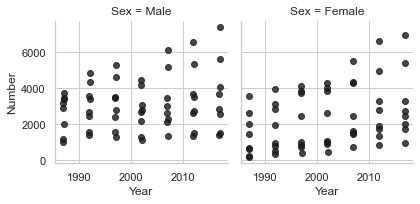

In [21]:
g = sns.FacetGrid(Tab014, col="Sex",  margin_titles=True)
g.map(sns.regplot, "Year", "Number", color=".1", fit_reg=False, x_jitter=.1);

In [22]:
Tab014.head()
Tab014_1.head()
Tab014_2.head()
Tab014_3.head(10)

Field of Study  Number
0                             Education   42196
1                           Engineering   46245
2                   Humanities and arts   34319
3                         Life sciences   64984
4     Mathematics and computer sciences   17208
5                                 Other   17030
6  Physical sciences and earth sciences   33138
7        Psychology and social sciences   51678

In [23]:
#dFF = pd.read_excel('../../WorkingFiles/NSF_NCSES/Data/Other/sed17-sr-tab014_Edited.xlsx')
dFFms =Tab014_2[Tab014_2['Sex']=='Male']
dFFfs =Tab014_2[Tab014_2['Sex']=='Female']

# dFFms = dFFm.groupby(['Field of Study', 'Sex']).sum()
# dFFfs = dFFf.groupby(['Field of Study', 'Sex']).sum()

dFFfs.head(50)


Field of Study     Sex  Number
0                              Education  Female   26898
2                            Engineering  Female    8331
4                    Humanities and arts  Female   16458
6                          Life sciences  Female   31698
8      Mathematics and computer sciences  Female    3926
10                                 Other  Female    7863
12  Physical sciences and earth sciences  Female    8916
14        Psychology and social sciences  Female   28084

#### 1.9) Pie Chart

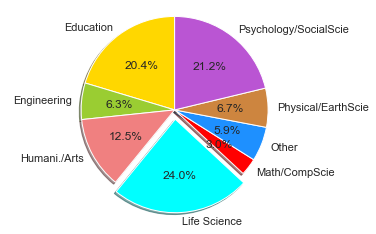

In [24]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Education', 'Engineering', 'Humani./Arts', 'Life Science', 'Math/CompScie', 'Other', 'Physical/EarthScie', 'Psychology/SocialScie'
sizesm = dFFms['Number']
sizesf = dFFfs['Number']
colors = ['gold', 'yellowgreen', 'lightcoral', 'cyan', 'red','dodgerblue', 'peru','mediumorchid']
explodef = (0, 0, 0, 0.1, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
explodem = (0, 0.1, 0, 0, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizesf, explode=explodef, labels=labels, colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

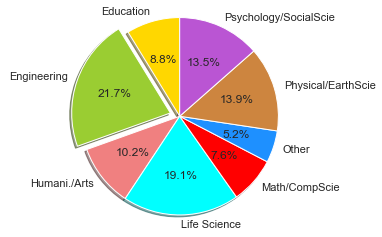

In [25]:
fig2, ax2 = plt.subplots()
ax2.pie(sizesm, explode=explodem, labels=labels, colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### 1.10) Gauge Chart

In [26]:
gauge = pygal.SolidGauge(inner_radius=0.70, human_readable=True,   legend_at_bottom=True)
gauge.title = 'Percentages of Female Doctrate Reciepents by Field of Study for All Selected Years'
percent_formatter = lambda x: '{:.10g}%'.format(x)

gauge.value_formatter = percent_formatter

gauge.add('Education', [{'value': 63.7, 'max_value': 100}])
gauge.add('Engineering', [{'value': 18}])
gauge.add('Humanities and arts', [{'value': 48}])
gauge.add('Life sciences', [{'value': 48.8}])
gauge.add('Mathematics and computer sciences', [{'value': 22.8}])
gauge.add('Other', [{'value': 46.2}])
gauge.add('Physical sciences and earth sciences', 26.9)
gauge.add('Psychology and social sciences', [{'value': 54.3}])
display(HTML(base_html.format(rendered_chart=gauge.render(is_unicode=True))))
# gauge.render()


In [27]:
# D
ages = [(364381, 358443, 360172, 345848, 334895, 326914, 323053, 312576, 302015, 301277, 309874, 318295, 323396, 332736, 330759, 335267, 345096, 352685, 368067, 381521, 380145, 378724, 388045, 382303, 373469, 365184, 342869, 316928, 285137, 273553, 250861, 221358, 195884, 179321, 171010, 162594, 152221, 148843, 143013, 135887, 125824, 121493, 115913, 113738, 105612, 99596, 91609, 83917, 75688, 69538, 62999, 58864, 54593, 48818, 44739, 41096, 39169, 36321, 34284, 32330, 31437, 30661, 31332, 30334, 23600, 21999, 20187, 19075, 16574, 15091, 14977, 14171, 13687, 13155, 12558, 11600, 10827, 10436, 9851, 9794, 8787, 7993, 6901, 6422, 5506, 4839, 4144, 3433, 2936, 2615),
   (346205, 340570, 342668, 328475, 319010, 312898, 308153, 296752, 289639, 290466, 296190, 303871, 309886, 317436, 315487, 316696, 325772, 331694, 345815, 354696, 354899, 351727, 354579, 341702, 336421, 321116, 292261, 261874, 242407, 229488, 208939, 184147, 162662, 147361, 140424, 134336, 126929, 125404, 122764, 116004, 105590, 100813, 95021, 90950, 85036, 79391, 72952, 66022, 59326, 52716, 46582, 42772, 38509, 34048, 30887, 28053, 26152, 23931, 22039, 20677, 19869, 19026, 18757, 18308, 14458, 13685, 12942, 12323, 11033, 10183, 10628, 10803, 10655, 10482, 10202, 10166, 9939, 10138, 10007, 10174, 9997, 9465, 9028, 8806, 8450, 7941, 7253, 6698, 6267, 5773),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 91, 412, 1319, 2984, 5816, 10053, 16045, 24240, 35066, 47828, 62384, 78916, 97822, 112738, 124414, 130658, 140789, 153951, 168560, 179996, 194471, 212006, 225209, 228886, 239690, 245974, 253459, 255455, 260715, 259980, 256481, 252222, 249467, 240268, 238465, 238167, 231361, 223832, 220459, 222512, 220099, 219301, 221322, 229783, 239336, 258360, 271151, 218063, 213461, 207617, 196227, 174615, 160855, 165410, 163070, 157379, 149698, 140570, 131785, 119936, 113751, 106989, 99294, 89097, 78413, 68174, 60592, 52189, 43375, 35469, 29648, 24575, 20863),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 392, 1351, 3906, 7847, 12857, 19913, 29108, 42475, 58287, 74163, 90724, 108375, 125886, 141559, 148061, 152871, 159725, 171298, 183536, 196136, 210831, 228757, 238731, 239616, 250036, 251759, 259593, 261832, 264864, 264702, 264070, 258117, 253678, 245440, 241342, 239843, 232493, 226118, 221644, 223440, 219833, 219659, 221271, 227123, 232865, 250646, 261796, 210136, 201824, 193109, 181831, 159280, 145235, 145929, 140266, 133082, 124350, 114441, 104655, 93223, 85899, 78800, 72081, 62645, 53214, 44086, 38481, 32219, 26867, 21443, 16899, 13680, 11508),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 5, 17, 15, 31, 34, 38, 35, 45, 299, 295, 218, 247, 252, 254, 222, 307, 316, 385, 416, 463, 557, 670, 830, 889, 1025, 1149, 1356, 1488, 1835, 1929, 2130, 2362, 2494, 2884, 3160, 3487, 3916, 4196, 4619, 5032, 5709, 6347, 7288, 8139, 9344, 11002, 12809, 11504, 11918, 12927, 13642, 13298, 14015, 15751, 17445, 18591, 19682, 20969, 21629, 22549, 23619, 25288, 26293, 27038, 27039, 27070, 27750, 27244, 25905, 24357, 22561, 21794, 20595),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 0, 8, 21, 34, 49, 84, 97, 368, 401, 414, 557, 654, 631, 689, 698, 858, 1031, 1120, 1263, 1614, 1882, 2137, 2516, 2923, 3132, 3741, 4259, 4930, 5320, 5948, 6548, 7463, 8309, 9142, 10321, 11167, 12062, 13317, 15238, 16706, 18236, 20336, 23407, 27024, 32502, 37334, 34454, 38080, 41811, 44490, 45247, 46830, 53616, 58798, 63224, 66841, 71086, 73654, 77334, 82062, 87314, 92207, 94603, 94113, 92753, 93174, 91812, 87757, 84255, 79723, 77536, 74173),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 11, 35, 137, 331, 803, 1580, 2361, 3632, 4866, 6849, 8754, 10422, 12316, 14152, 16911, 19788, 22822, 27329, 31547, 35711, 38932, 42956, 46466, 49983, 52885, 55178, 56549, 57632, 57770, 57427, 56348, 55593, 55554, 53266, 51084, 49342, 48555, 47067, 45789, 44988, 44624, 44238, 46267, 46203, 36964, 33866, 31701, 28770, 25174, 22702, 21934, 20638, 19051, 17073, 15381, 13736, 11690, 10368, 9350, 8375, 7063, 6006, 5044, 4030, 3420, 2612, 2006, 1709, 1264, 1018),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 6, 11, 20, 68, 179, 480, 1077, 2094, 3581, 5151, 7047, 9590, 12434, 15039, 17257, 19098, 21324, 24453, 27813, 32316, 37281, 43597, 49647, 53559, 58888, 62375, 67219, 70956, 73547, 74904, 75994, 76224, 74979, 72064, 70330, 68944, 66527, 63073, 60899, 60968, 58756, 57647, 56301, 57246, 57068, 59027, 59187, 47549, 44425, 40976, 38077, 32904, 29431, 29491, 28020, 26086, 24069, 21742, 19498, 17400, 15738, 14451, 13107, 11568, 10171, 8530, 7273, 6488, 5372, 4499, 3691, 3259, 2657)]

types = ['Males single', 'Females single',
         'Males married', 'Females married',
         'Males widowed', 'Females widowed',
         'Males divorced', 'Females divorced']

pyramid_chart = pygal.Pyramid(human_readable=True, legend_at_bottom=True)
pyramid_chart.title = 'England population by age in 2010 (source: ons.gov.uk)'
pyramid_chart.x_labels = map(lambda x: str(x) if not x % 5 else '', range(90))
for type, age in zip(types, ages):
    pyramid_chart.add(type, age)
display(HTML(base_html.format(rendered_chart=pyramid_chart.render(is_unicode=True))))
# gauge.render()


In [28]:
# # Style 
# from pygal.style import DarkStyle
# chart = pygal.StackedLine(fill=True, interpolate='cubic', style=RedBlueStyle)
# chart.add('A', [1, 3, 5, 16, 13, 3, 7])
# chart.add('B', [5, 2, 3, 2, 5, 7, 17])
# chart.add('C', [6, 10, 9, 7, 3, 1, 0])
# chart.add('D', [2, 3, 5, 9, 12, 9, 5])
# chart.add('E', [7, 4, 2, 1, 2, 10, 0])
# display(HTML(base_html.format(rendered_chart=chart.render(is_unicode=True))))


### 2) U.S. Citizen and Permanent Resident Doctorate Recipients by Major Field of Study and Race/Ethnicity: 2017  

The data is downloaded from https://ncses.nsf.gov/pubs/nsf19301/data. 


In [29]:
df = pd.read_excel('../../Users/muluken/WorkingFiles/NSF_NCSES/Data/Other/sed17-sr-tab024_edited_Formatted.xlsx')
df.columns = ['All Fields', 'Field of Study','Sub Field','Race/Ethnicity', 'FSNumber','REFSNumber','REFSPercent',  'SubNumber', 'RESubNumber', 'RESubPercent']
dfA = df[['Field of Study','Sub Field','Race/Ethnicity', 'FSNumber','REFSNumber', 'REFSPercent',  'SubNumber', 'RESubNumber', 'RESubPercent']] 
dfA.set_index("Field of Study", inplace = True) 
dfA.head()
# Data by Field of Study
LSc   = dfA.loc['Life sciences']
PSES = dfA.loc['Physical sciences and earth sciences']
MCS   = dfA.loc['Mathematics and computer sciences']
PSYC  = dfA.loc['Psychology and social sciences ']
Engr  = dfA.loc['Engineering']
Edu = dfA.loc['Education']
HumAr = dfA.loc['Humanities and arts']
Oth  = dfA.loc['Other']
#dfA.shape
#dfA.head()
#df.columns
#Oth.head(9)

#### 2.1) Lolilop

Text(0, 0.5, 'Race/Ethnicity')

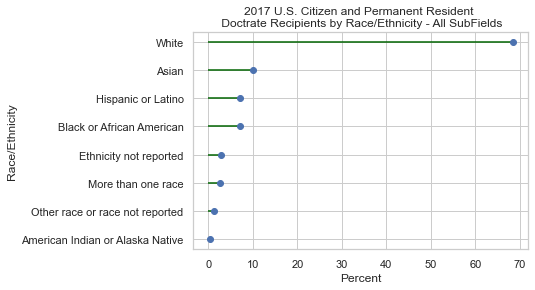

In [30]:
# Aggregate Race/Ethnicity
dfA_mean = dfA.groupby('Race/Ethnicity', as_index=False)['RESubPercent'].mean()
# Reorder it following the values:
ordered_dfA = dfA_mean.sort_values(by='RESubPercent')
my_range=range(1,len(ordered_dfA.index)+1)

plt.hlines(y=my_range, xmin=0, xmax=ordered_dfA['RESubPercent'], color='darkgreen')
plt.plot(ordered_dfA['RESubPercent'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_dfA['Race/Ethnicity'])
plt.title("2017 U.S. Citizen and Permanent Resident \n Doctrate Recipients by Race/Ethnicity - All SubFields", loc='center')
plt.xlabel('Percent')
plt.ylabel('Race/Ethnicity')

Text(0, 0.5, 'Race/Ethnicity')

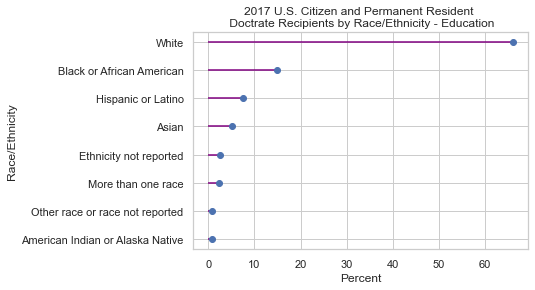

In [31]:
# Aggregate Race/Ethnicity
Edu_mean = Edu.groupby('Race/Ethnicity', as_index=False)['RESubPercent'].mean()
# Reorder it following the values:
ordered_Edu = Edu_mean.sort_values(by='RESubPercent')
my_range=range(1,len(ordered_Edu.index)+1)

plt.hlines(y=my_range, xmin=0, xmax=ordered_Edu['RESubPercent'], color='purple')
plt.plot(ordered_Edu['RESubPercent'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_Edu['Race/Ethnicity'])
plt.title("2017 U.S. Citizen and Permanent Resident \n Doctrate Recipients by Race/Ethnicity - Education", loc='center')
plt.xlabel('Percent')
plt.ylabel('Race/Ethnicity')


Text(0, 0.5, 'Race/Ethnicity')

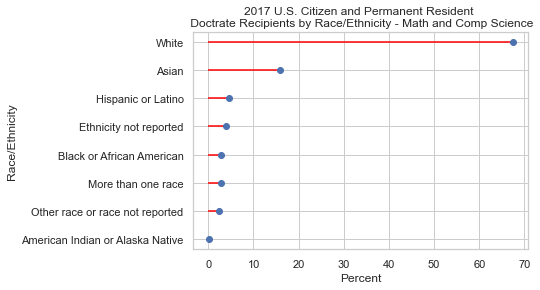

In [32]:
# Aggregate Race/Ethnicity
MCS_mean = MCS.groupby('Race/Ethnicity', as_index=False)['RESubPercent'].mean()
# Reorder it following the values:
ordered_MCS = MCS_mean.sort_values(by='RESubPercent')
my_range=range(1,len(ordered_MCS.index)+1)

plt.hlines(y=my_range, xmin=0, xmax=ordered_MCS['RESubPercent'], color='red')
plt.plot(ordered_MCS['RESubPercent'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_MCS['Race/Ethnicity'])
plt.title("2017 U.S. Citizen and Permanent Resident \n Doctrate Recipients by Race/Ethnicity - Math and Comp Science", loc='center')
plt.xlabel('Percent')
plt.ylabel('Race/Ethnicity')

#### 2.2) Box Plots

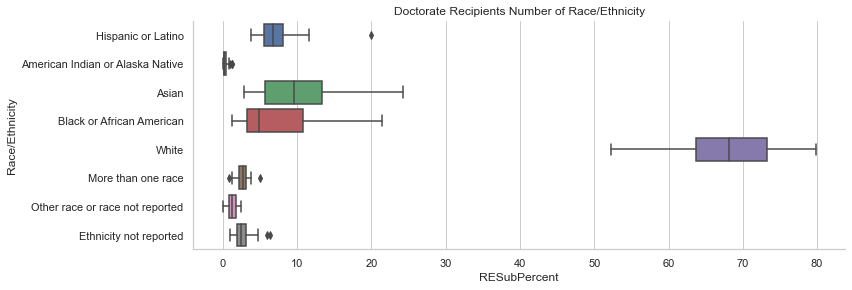

In [33]:
sns.catplot(y="Race/Ethnicity", x="RESubPercent", height=4, aspect=3,kind="box", data=dfA).set(title="Doctorate Recipients Number of Race/Ethnicity");
#sns.catplot(x="'Race/Ethnicity'", y="Number", hue="smoker", kind="box", data=dfA_mean);


#### 2.3) Scatter Plot

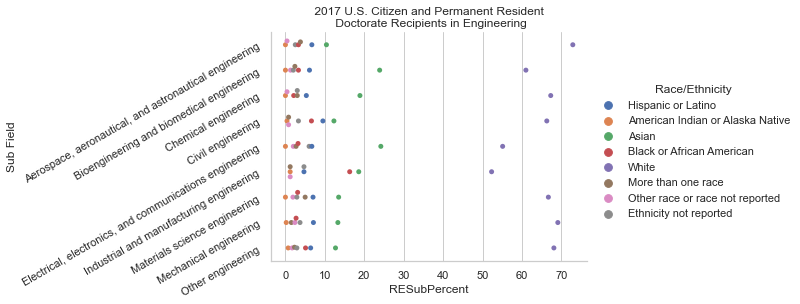

In [34]:
chart = sns.catplot(x = "RESubPercent", y="Sub Field",   height=4, aspect=2.5, hue="Race/Ethnicity", kind="swarm", data=Engr).set(title=" 2017 U.S. Citizen and Permanent Resident \n Doctorate Recipients in Engineering");
chart.set_yticklabels(rotation=30)

#### 2.4) Donut

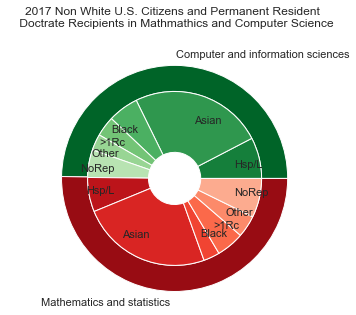

In [35]:
## https://python-graph-gallery.com/163-donut-plot-with-subgroups/
 
# Make data: I have 3 groups and 7 subgroups
#Life Science
group_names=['Computer and information sciences', 'Mathematics and statistics ']
group_size=[280,283]
#subgroup_names=['Hsp/L', 'AmInd', 'Asian', 'Black', 'White', '>1Rc', 'Other', 'NoRep', 'Hsp/L', 'AmInd', 'Asian', 'Black', 'White', '>1Rc', 'Other', 'NoRep']
#subgroup_size=[43, 0, 139, 32,515,21,17,29,36,1,137,17,666,29,23,41]
subgroup_names=['Hsp/L','Asian', 'Black',  '>1Rc', 'Other', 'NoRep', 'Hsp/L',  'Asian', 'Black',  '>1Rc', 'Other', 'NoRep']
subgroup_size=[43,139, 32,21,17,29,36, 137,17,29,23,41]

 
# Create colors
a, b, =[plt.cm.Greens, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.9), b(0.9)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.8), a(0.7), a(0.6),a(0.5), a(0.4), a(0.3), b(0.8), b(0.7), b(0.6),b(0.5), b(0.4), b(0.3)])
plt.setp( mypie2, width=0.7, edgecolor='white')
plt.margins(0,0)
 
figure_title = "2017 Non White U.S. Citizens and Permanent Resident \n Doctrate Recipients in Mathmathics and Computer Science"  
plt.text(0.5, 1.2, figure_title,
         horizontalalignment='center',
         fontsize=12,
         transform = ax.transAxes)
# show it
plt.show()

#### 2.5) Swarm Scatter Plot

In [36]:
modified = dfA.reset_index()
modified.head(2)

Field of Study                                    Sub Field  \
0  Life sciences  Agricultural sciences and natural resources   
1  Life sciences  Agricultural sciences and natural resources   

                     Race/Ethnicity  FSNumber  REFSNumber  REFSPercent  \
0                Hispanic or Latino      8857         602          6.8   
1  American Indian or Alaska Native      8857          27          0.3   

   SubNumber  RESubNumber  RESubPercent  
0        902           49           5.4  
1        902            2           0.2

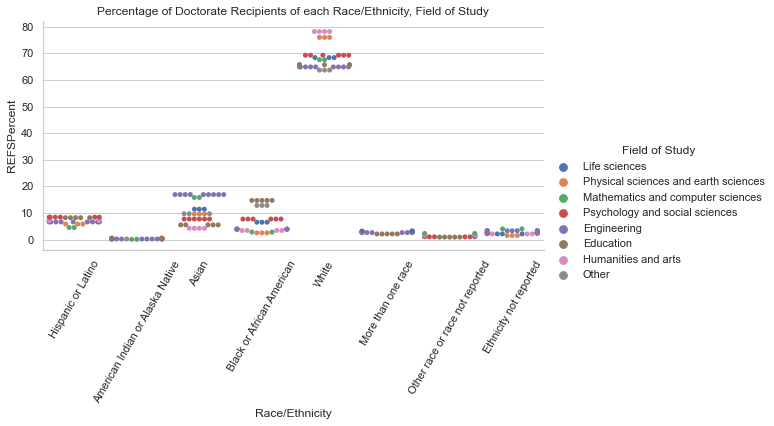

In [37]:
modified = dfA.reset_index()

chart =sns.catplot(x="Race/Ethnicity", y="REFSPercent", height=4, aspect=2, hue="Field of Study", kind="swarm", data=modified ).set(title="Percentage of Doctorate Recipients of each Race/Ethnicity, Field of Study");
chart.set_xticklabels(rotation=60)
#modified.head()

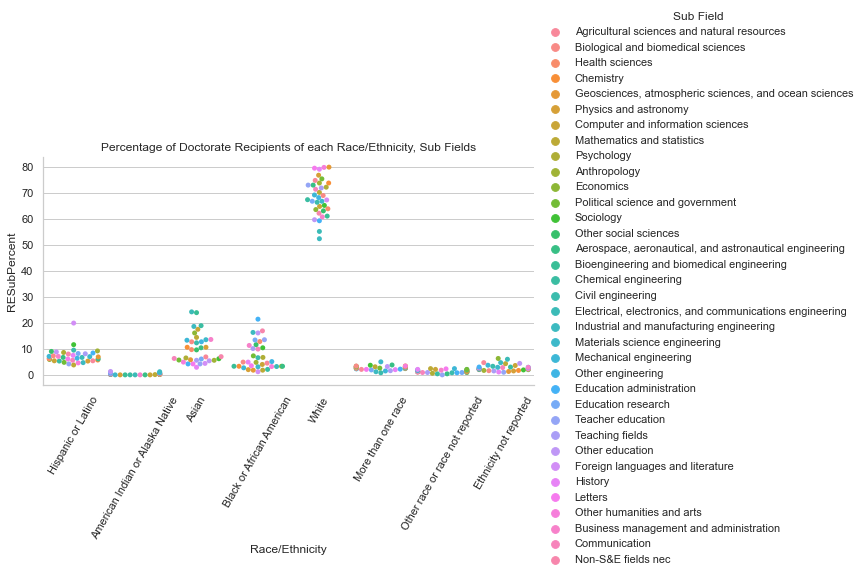

In [38]:
modified = dfA.reset_index()

chart =sns.catplot(x="Race/Ethnicity", y="RESubPercent", height=4, aspect=2, hue="Sub Field", kind="swarm", data=modified ).set(title="Percentage of Doctorate Recipients of each Race/Ethnicity, Sub Fields");
chart.set_xticklabels(rotation=60)
#modified.head()

#### 2.6) Stacked Bars

In [39]:
# from bokeh.io import output_file, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, Legend
from bokeh.palettes import GnBu3, OrRd3, PRGn7, Paired8
from bokeh.plotting import figure, show

output_notebook()
#output_file("stacked_split.html")

FS = ['Life sciences','Physical sciences and earth sciences','Mathematics and computer sciences','Psychology and social sciences', 'Engineering', 'Education','Humanities and arts', 'Other']

RaceEthn = ["White", "Hispanic or Latino", "American Indian or Alaska Native", "Asian","Black or African American",  "More than one race", "Other race or race not reported","Ethnicity not reported"]
FoS = {'FS' : FS,
            'White' :  [68.4, 76.0, 67.6, 69.3, 64.9, 65.7, 78.2, 63.7],
            'Hispanic or Latino'   : [6.8, 5.8, 4.5, 8.4, 6.6, 8.2, 7.2, 7.0],
            'American Indian or Alaska Native'   : [0.3, 0.2, 0.1, 0.4, 0.2, 0.5, 0.4, 0.2],
            'Asian'   : [11.4, 9.6, 15.8, 7.7, 16.9, 5.5, 4.2, 9.7],
            'Black or African American': [6.5, 2.5, 2.8, 7.7, 3.9, 14.7, 3.4, 12.8],
            'More than one race': [3.2, 3.0, 2.9, 3.0, 2.6, 2.1, 2.7, 2.7],
            'Other race or race not reported': [1.2, 1.4, 2.3, 1.0, 1.5, 0.9, 1.8, 1.3],
            'Ethnicity not reported': [2.1, 1.5, 4.0, 2.5, 3.3, 2.4, 2.1, 2.7]}

p = figure(y_range=FS, plot_width=800, plot_height=300, x_range=(0, 150), title="Field of Study by Race/Ethnicity  (%)",
           toolbar_location=None)

p.hbar_stack(RaceEthn, y='FS', height=0.9, color=Paired8, source=ColumnDataSource(FoS),
             legend_label=["%s" % x for x in RaceEthn])

#p.add_layout(Legend(), 'right')

p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = (400,50)
p.axis.minor_tick_line_color = None
p.outline_line_color = None
show(p)

Loading BokehJS ...

In [40]:
#from bokeh.io import output_file, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, Legend
from bokeh.palettes import GnBu3, OrRd3, PRGn7, Paired8
from bokeh.plotting import figure, show

output_notebook()
#output_file("stacked_split.html")

FS = ["Biological& biomedical Sci","Health Scie","Chemistry","Geosc., atmo. scie,& ocean Scie.",
      "Physics & astronomy","Computer & infor scie","Mathematics & statistics","Psychology", "Anthropology",
      "Economics","Political Scie & government","Sociology","Other social scie.","Aerospace, aeronautical, & astronautical engr.",
      "Bioengineering and biomedical engineering","Chemical engineering","Civil engineering","Electr, electro, and commun engr",
      "Indus& manufac engr","Materials scierengr","Mechanical engr","Other engr", "Education admin","Education research","Teacher education","Teaching fields","Other education",
      "Foreign lang & liter","History","Letters","Other humanities & arts","Business mgnt & admin",
      "Communication","Non-S&E fields nec"]

RaceEthn = ["White", "Hispanic or Latino", "American Indian or Alaska Native", "Asian","Black or African American",  "More than one race", "Other race or race not reported","Ethnicity not reported"]
FoS = {'FS' : FS,
            'White' :  [68.9,63.8,73.7,79.8,76.7,64.7,70.1,72.1,73.7,63.5,75.3,65.1,63.0,72.9,61.0,67.3,66.3,55.1,52.3,66.7,69.1,68.1,59.2,66.7,72.9,71.8,59.6,67.2,79.0,79.4,79.7,60.7,71.3,62.1],
            'Hispanic or Latino'   : [7.3, 6.2,5.7,6.9,5.3,5.4,3.8,8.6,9.2,5.9,4.8,11.6,9.0,6.7,6.1,5.3,9.5,6.7,4.7,7.0,7.1,6.4,8.4,8.2,4.2,8.1,8.8,19.9,7.5,6.1,4.6,7.1,5.6,8.0],
            'American Indian or Alaska Native'   : [0.2,0.5,0.2,0.3,0.0,0.0,0.1,0.3,0.3,0.2,0.2,0.2,0.8,0.0,0.0,0.0,0.4,0.0,1.2,0.0,0.2,0.7,0.8,0.3,1.0,0.4,1.3,0.5,0.4,0.5,0.2,0.0,0.2,0.3],
            'Asian'   : [12.7,9.7,10.6,5.8,10.6,17.5,14.4,6.5,5.6,16.1,5.7,6.2,9.6,10.4,23.9,18.9,12.3,24.2,18.6,13.5,13.3,12.7,4.2,6.1,4.2,5.6,5.4,4.4,2.9,4.2,4.9,13.6,6.3,7.0],
            'Black or African American': [4.9,12.8,3.3,1.8,2.0,4.0,1.8,6.7,4.8,3.3,7.3,10.4,11.6,3.3,3.3,2.1,6.6,3.2,16.3,3.1,2.7,5.1,21.4,13.4,13.5,10.1,16.1,1.2,4.9,3.5,3.2,11.3,9.9,16.9],
            'More than one race': [3.4,3.2,3.4,2.7,2.7,2.6,3.1,3.1,3.1,3.3,2.6,3.7,2.4,3.8,2.4,3.0,0.8,2.7,1.2,5.0,1.5,2.3,2.2,1.9,3.1,1.6,3.2,3.0,2.0,2.1,3.4,2.5,3.0,2.5],
            'Other race or race not reported': [1.1,1.5,1.4,1.5,1.2,2.1,2.4,0.6,1.7,1.3,2.1,0.9,1.3,0.4,1.3,0.4,0.8,2.0,1.2,1.9,2.4,1.7,0.8,0.9,0.0,0.9,1.3,1.4,2.1,2.3,1.4,1.8,0.9,1.0],
            'Ethnicity not reported': [1.6,2.3,1.7,1.3,1.5,3.6,4.3,2.2,1.7,6.3,2.1,1.9,2.2,2.5,2.0,3.0,3.3,6.0,4.7,2.9,3.7,2.9,3.0,2.3,1.0,1.5,4.4,2.5,1.1,2.0,2.6,2.9,2.8,2.2]}

p = figure(y_range=FS, plot_width=1000, plot_height=800, x_range=(0, 150), title="Sub Field of Study by Race/Ethnicity  (%)",
           toolbar_location = None)

p.hbar_stack(RaceEthn, y='FS', height=0.9, color=Paired8, source=ColumnDataSource(FoS),
             legend_label=["%s" % x for x in RaceEthn])

#p.add_layout(Legend(), 'right')

p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = (500,50)
p.axis.minor_tick_line_color = None
p.outline_line_color = None

show(p)

Loading BokehJS ...

#### 2.7) Treemap

In [41]:
modified.head(2)

Field of Study                                    Sub Field  \
0  Life sciences  Agricultural sciences and natural resources   
1  Life sciences  Agricultural sciences and natural resources   

                     Race/Ethnicity  FSNumber  REFSNumber  REFSPercent  \
0                Hispanic or Latino      8857         602          6.8   
1  American Indian or Alaska Native      8857          27          0.3   

   SubNumber  RESubNumber  RESubPercent  
0        902           49           5.4  
1        902            2           0.2

In [42]:
#mod2 = modified.groupby(['Race/Ethnicity'])['REFSNumber','REFSPercent'].mean()
#mod2 = modified.groupby(['Field of Study', 'Race/Ethnicity'])['FSNumber','REFSNumber'].sum()
#mod2.head(100)

In [43]:
values_by_category = modified.groupby('Race/Ethnicity')['REFSNumber'].apply(list)
values_by_category

Race/Ethnicity
American Indian or Alaska Native    [27, 27, 27, 7, 7, 7, 2, 2, 27, 27, 27, 27, 27...
Asian                               [1010, 1010, 1010, 357, 357, 357, 276, 276, 52...
Black or African American           [576, 576, 576, 93, 93, 93, 49, 49, 529, 529, ...
Ethnicity not reported              [186, 186, 186, 56, 56, 56, 70, 70, 172, 172, ...
Hispanic or Latino                  [602, 602, 602, 216, 216, 216, 79, 79, 577, 57...
More than one race                  [283, 283, 283, 112, 112, 112, 51, 51, 206, 20...
Other race or race not reported     [106, 106, 106, 52, 52, 52, 40, 40, 69, 69, 69...
White                               [6058, 6058, 6058, 2825, 2825, 2825, 1180, 118...
Name: REFSNumber, dtype: object

In [44]:
treemap = pygal.Treemap(height=400, human_readable=True, legend_at_bottom=True)
treemap.title="All Sub Fields Number by Race/Ethnicity - 2017 Survey Data"
[treemap.add(x[0], x[1]) for x in values_by_category.items()]
display(HTML(base_html.format(rendered_chart=treemap.render(is_unicode=True))))

In [45]:
#values_by_category = modified.groupby('Race/Ethnicity')['REFSNumber'].apply(list)
values_by_category1 = modified.groupby(['Race/Ethnicity'], axis=0).apply(
    lambda x : [{"REFSNumber" : l, "label" : c } for l, c in zip(x['REFSNumber'], x['Sub Field'])])
values_by_category1

Race/Ethnicity
American Indian or Alaska Native    [{'REFSNumber': 27, 'label': 'Agricultural sci...
Asian                               [{'REFSNumber': 1010, 'label': 'Agricultural s...
Black or African American           [{'REFSNumber': 576, 'label': 'Agricultural sc...
Ethnicity not reported              [{'REFSNumber': 186, 'label': 'Agricultural sc...
Hispanic or Latino                  [{'REFSNumber': 602, 'label': 'Agricultural sc...
More than one race                  [{'REFSNumber': 283, 'label': 'Agricultural sc...
Other race or race not reported     [{'REFSNumber': 106, 'label': 'Agricultural sc...
White                               [{'REFSNumber': 6058, 'label': 'Agricultural s...
dtype: object

In [46]:
treemap = pygal.Treemap(height=200,  show_legend=True)
treemap.title="All Sub Fields Number by Race/Ethnicity - 2017 "
[treemap.add(x[0], x[1]) for x in values_by_category1.iteritems()]
display(HTML(base_html.format(rendered_chart=treemap.render(is_unicode=True))))

In [47]:
values_by_category = modified.groupby('Field of Study')['REFSNumber'].apply(list)
values_by_category
treemap = pygal.Treemap(height=400, human_readable=True, legend_at_bottom=True)
treemap.title="All Sub Fields Number by Field of Study - 2017 Survey"
[treemap.add(x[0], x[1]) for x in values_by_category.items()]
display(HTML(base_html.format(rendered_chart=treemap.render(is_unicode=True))))

#### 2.8) Bar Plot

In [48]:
mean_by_category = modified.groupby('Race/Ethnicity')['REFSPercent'].mean()
mean_by_category

Race/Ethnicity
American Indian or Alaska Native     0.302857
Asian                               10.465714
Black or African American            6.840000
Ethnicity not reported               2.628571
Hispanic or Latino                   7.068571
More than one race                   2.720000
Other race or race not reported      1.357143
White                               68.591429
Name: REFSPercent, dtype: float64

In [49]:
bar_chart = pygal.Bar(height=400, human_readable=True, legend_at_bottom=True)
bar_chart.title="Percentages of Doctrate Recipients by Race/Ethnicity - 2017 Survey"
[bar_chart.add(x[0], x[1]) for x in mean_by_category.items()]
display(HTML(base_html.format(rendered_chart=bar_chart.render(is_unicode=True))))

#### 2.9) Gauge Chart

In [50]:
mean_by_category2 = modified.groupby('Race/Ethnicity')['REFSNumber'].sum()
mean_by_category2

Race/Ethnicity
American Indian or Alaska Native       529
Asian                                16817
Black or African American            11097
Ethnicity not reported                4186
Hispanic or Latino                   11946
More than one race                    4585
Other race or race not reported       2116
White                               113324
Name: REFSNumber, dtype: int64

In [51]:
gauge = pygal.Gauge(human_readable=True,  legend_at_bottom=True)
gauge.title="Number of Doctrate Recipients by Race/Ethnicity - 2017 Survey"
[gauge.add(x[0], [{"value" : x[1] * 100}] ) for x in mean_by_category2.iteritems()]
display(HTML(base_html.format(rendered_chart=gauge.render(is_unicode=True))))

#### 2.10) Sunburst Chart

In [52]:
import plotly.express as px
#df = px.data.tips()
fig = px.sunburst(modified, path=['Field of Study', 'Sub Field', 'Race/Ethnicity'], values='RESubNumber')
fig.update_layout(
    title={
        'text': "Field of Study of Doctrate Recipients by Sub Field and Race/Ethnicity - 2017 Survey",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()


### 3) National Survey of College Graduates: 2017  

The 2017 National survey of College Graduates downloaded from https://ncsesdata.nsf.gov/datadownload/.

In [53]:
epcg17 = pd.read_excel('../../Users/muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/epcg17_ForAnalysis.xlsx')
epcg17.columns
Race = pd.read_excel('../../Users/muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/RACETHM.xlsx')
Loc = pd.read_excel('../../Users/muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/BARGN.xlsx')
Loc2 = pd.read_excel('../../Users/muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/BAST.xlsx')

In [54]:
nData = pd.merge(epcg17, Race)
nData2 = pd.merge(nData, Loc)
nData3 = pd.merge(nData2, Loc2)
# nData3.shape
nData3.head()
# nData3.columns

AGE  AGEGR ASDGRI ASIAN  BAACYR BARGN  BAST  BAYR  BIRMN  BIRYR  ... WHITE  \
0   37     35      Y     N    2002    00    99  2002     97   1979  ...     N   
1   45     45      N     N    1994    00    99  1994     97   1972  ...     N   
2   52     50      N     N    1988    00    99  1988     97   1964  ...     N   
3   56     55      N     N    1983    00    99  1982     97   1960  ...     N   
4   33     30      N     N    2009    00    99  2008     97   1983  ...     N   

  WRKGP  RaceEthn          LocSch Country Continent           Cntr   CC  \
0     Y     Black  US Unspecified      US       NA.  United States  NaN   
1     Y     Black  US Unspecified      US       NA.  United States  NaN   
2     Y     Black  US Unspecified      US       NA.  United States  NaN   
3     Y     Black  US Unspecified      US       NA.  United States  NaN   
4     Y     Black  US Unspecified      US       NA.  United States  NaN   

   ISO2_code  ISO3_code  
0         US        USA  
1         US        USA  
2         US        USA  
3         US        USA  
4         US        USA  

[5 rows x 30 columns]

In [55]:
df3 = nData3[['AGE','AGEGR', 'BAYR',  'GENDER',  'WRKGP', 'RaceEthn', 'Cntr', 'Continent', 'CC', 'ISO2_code','ISO3_code']]
# AGE     --- Age
# AGEGR   --- Age Group (5 year intervals)
# ASDGRI  --- 2-Year Associates Degree
# BAACYR  --- Academic year of award for first bachelor's degree
# BARGN   --- Location of school awarding first bachelor's degree (region code)
# BAST    --- Location of school awarding first bachelor's degree (state/country code)
# BAYR    --- Year of award of first bachelor's degree
# BIRMN   --- Birth date: Month
# BIRYR   --- Birth date: Year
# BSDGRI  --- Bachelor's or high degree indicator
# BTHRGN  --- Place of birth (region code)
# GENDER  --- Gender
# RACEM   --- Race 
# RACETHM --- Race/ethnicity
# WRKG    --- Working for pay or profit during reference week

In [56]:
epcg17 = pd.read_excel('../../Users/muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/epcg17_ForAnalysis.xlsx')
epcg17.columns
Race = pd.read_excel('../../Users/muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/RACETHM.xlsx')
Loc = pd.read_excel('../../Users/muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/BARGN.xlsx')
Loc2 = pd.read_excel('../../Users/muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/BAST.xlsx')
nData = pd.merge(epcg17, Race)

nData2 = pd.merge(nData, Loc)
nData3 = pd.merge(nData2, Loc2)
nData3.shape
nData3['Number']=1
nData3.head(3)

AGE  AGEGR ASDGRI ASIAN  BAACYR BARGN  BAST  BAYR  BIRMN  BIRYR  ... WRKGP  \
0   37     35      Y     N    2002    00    99  2002     97   1979  ...     Y   
1   45     45      N     N    1994    00    99  1994     97   1972  ...     Y   
2   52     50      N     N    1988    00    99  1988     97   1964  ...     Y   

  RaceEthn          LocSch Country Continent           Cntr   CC ISO2_code  \
0    Black  US Unspecified      US       NA.  United States  NaN        US   
1    Black  US Unspecified      US       NA.  United States  NaN        US   
2    Black  US Unspecified      US       NA.  United States  NaN        US   

   ISO3_code  Number  
0        USA       1  
1        USA       1  
2        USA       1  

[3 rows x 31 columns]

In [57]:
#epcg17.columns

In [58]:
df3 = nData3[['AGE','AGEGR', 'BAYR',  'GENDER',  'WRKGP', 'RaceEthn', 'Cntr', 'Continent', 'CC', 'ISO2_code','ISO3_code', 'Number']]
# df3.columns
# df3.head()
# df3.shape

#### 3.1) Sankey Diagram

In [59]:
#df3 = nData3[['AGE','AGEGR', 'BAYR',  'GENDER',  'WRKGP', 'RaceEthn', 'Cntr', 'Continent', 'Value']]
df3 = nData3[['AGEGR',  'BAYR', 'GENDER', 'RaceEthn', 'WRKGP', 'Number']]
df4 = df3.groupby([ 'AGEGR','GENDER', 'RaceEthn', 'WRKGP'])['Number'].agg('sum')
df4.head(100)
#df3.describe(include='all')
df5 = df4.to_frame()
#df5.columns =df5[['AGEGR', 'GENDER','RaceEthn','BAYR', 'WRKGP', 'Value']]
df5.head(10)
#df5.columns
df6 = df5.reset_index()
#df5[['AGEGR', 'GENDER']] = df5.index
#df6.head(100)

In [60]:
# !pip install holoviews 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
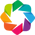

RaceEthn GENDER  AGEGR  Number
0  AmIndNative      F     20       1
1  AmIndNative      F     20       1
2        Asian      F     20      10
3        Asian      F     20      60
4        Asian      F     20      50

In [61]:
import holoviews as hv
from holoviews import opts
import holoviews.plotting
import plotly.graph_objects as go
import plotly.express as pex
hv.extension('bokeh')
df7 = df6[["RaceEthn", "GENDER","AGEGR", "Number"]]
df7.head()

In [62]:
# hv.Sankey(df7)

In [63]:
sankey1 = hv.Sankey(df7, kdims=["RaceEthn", "GENDER"], vdims=["AGEGR", "Number"])

sankey1.opts(cmap='Colorblind',label_position='left',
                                 edge_color='RaceEthn', edge_line_width=0,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=800, height=600, bgcolor="snow",
                                 title="Graduates by Race/Ethnicity, Gender and age Group")

:Sankey   [RaceEthn,GENDER]   (AGEGR,Number)

In [64]:
# fig = px.scatter(df6, x="RaceEthn", y="Number", color="GENDER", title="A Plotly Express Figure")

# fig.show()

In [65]:
# plt.style.use('ggplot')
# sns.catplot(x="GENDER", y="Number", data=df6);

#### 3.2) Box Plot

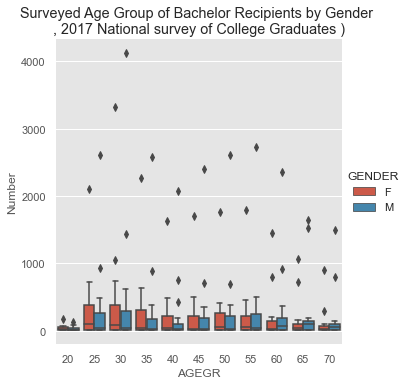

In [66]:
plt.style.use('ggplot')
sns.catplot(x="AGEGR", y="Number", hue="GENDER", kind="box",
            data=df6).set(title="Surveyed Age Group of Bachelor Recipients by Gender \n, 2017 National survey of College Graduates )");


In [67]:
# g = sns.FacetGrid(df6, hue="GENDER", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
# g.map(plt.scatter, "Number", "AGEGR", s=100, linewidth=.5, edgecolor="white")
# g.add_legend();
# plt.title("Scatterplot of Age Group of Bachelor Recipients by Gender \n, 2017 National survey of College Graduates")

In [68]:
# g = sns.FacetGrid(df6, col="GENDER", hue="WRKGP")
# g.map(plt.scatter,  "Number", "AGEGR", alpha=.7)
# g.add_legend();
# plt.title("Scatterplot of Age Group of Bachelor Recipients by Gender and Employment Status indicator \n, 2017 National survey of College Graduates")

In [69]:
# g = sns.FacetGrid(df6, row="WRKGP", col="GENDER", margin_titles=True)
# g.map(sns.regplot, "AGEGR", "Number", color=".2", fit_reg=False, x_jitter=.1);

# plt.title("Scatterplot of Age Group of Bachelor Recipients by Gender and Employment Status indicator \n, 2017 National survey of College Graduates")

In [70]:
df6.head()
#df6_1.head()

AGEGR GENDER     RaceEthn WRKGP  Number
0     20      F  AmIndNative     N       1
1     20      F  AmIndNative     Y       1
2     20      F        Asian     L      10
3     20      F        Asian     N      60
4     20      F        Asian     Y      50

#### 3.3) Heatmaps

Text(0.5, 1.0, 'Heatmap map of Surveyed Age Group of Bachelor Recipients by Race/Ethnicity,  \n 2017 National survey of College Graduates')

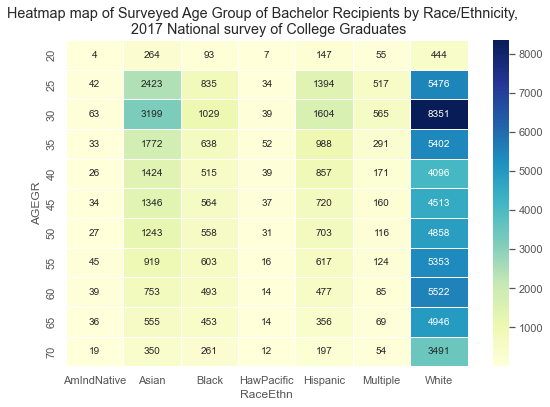

In [71]:
df6.head()
df66 = nData3.groupby([ 'AGEGR', 'RaceEthn'])['Number'].agg('count')
df61 = df66.to_frame()
df61 = df61.reset_index()
df6_1 = df61.pivot('AGEGR', 'RaceEthn', 'Number')
df6_1.head()
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df6_1, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, ax=ax)
plt.title("Heatmap map of Surveyed Age Group of Bachelor Recipients by Race/Ethnicity,  \n 2017 National survey of College Graduates")

In [72]:
# chart =sns.catplot(x="AGEGR", y="Number", height=4, aspect=2, hue="RaceEthn", kind="swarm", data=df6 );
# chart.set_xticklabels(rotation=90)
# #modified.head()
# plt.title("Scatterplot of Age Group of Bachelor Recipients by G Race/Ethnicity \n, 2017 National survey of College Graduates")

Text(0.5, 1.0, 'Heatmap map of Surveyed Age Group of Bachelor Recipients by Gender,  \n 2017 National survey of College Graduates')

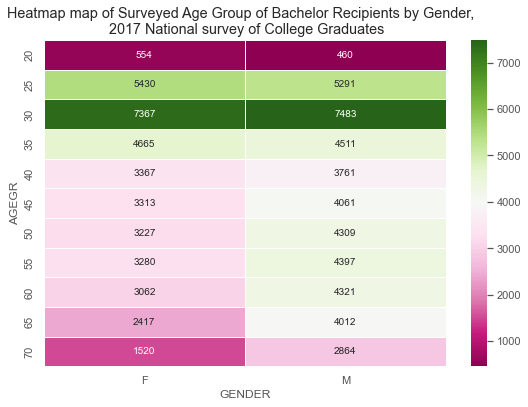

In [73]:
df9 = nData3.groupby([ 'AGEGR', 'GENDER'])['Number'].agg('count')
df91 = df9.to_frame()
df91 = df91.reset_index()
df9_1 = df91.pivot('AGEGR', 'GENDER', 'Number')
df9_1.head()
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df9_1, annot=True, fmt="d", cmap="PiYG", linewidths=.5, ax=ax)
plt.title("Heatmap map of Surveyed Age Group of Bachelor Recipients by Gender,  \n 2017 National survey of College Graduates")

In [74]:
# chart =sns.catplot(x="RaceEthn", y="Number", height=4, aspect=2, hue="GENDER", kind="swarm", data=df6 );
# chart.set_xticklabels(rotation=90)
# #modified.head()
# plt.title("Scatterplot of Age Group of Bachelor Recipients by Gender  \n, 2017 National survey of College Graduates")

In [75]:
# # Draw a heatmap with the numeric values in each cell
# f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(d46, annot=True, fmt="d", linewidths=.5, ax=ax)
# plt.title("Heatmap map of Age Group of Bachelor Recipients by Gender  \n, 2017 National survey of College Graduates")

Text(0.5, 1.0, 'Heatmap map of Bachelor Recipients by Race/Ethnicity and Age group \n, 2017 National survey of College Graduates')

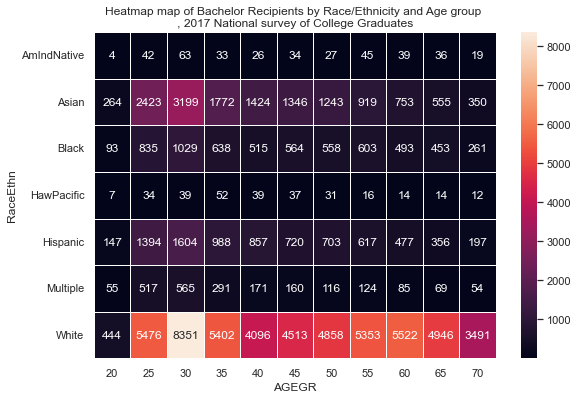

In [76]:
#df3 = nData3[['AGE','AGEGR', 'BAYR',  'GENDER',  'WRKGP', 'RaceEthn', 'Cntr', 'Continent', 'Value']]
d1 = nData3[[  'AGEGR', 'RaceEthn', 'Number']]
d2 = d1.groupby([ 'AGEGR', 'RaceEthn'])['Number'].agg('count')
d2.head(100)

d3 = d2.to_frame()

d3.head(10)
#df5.columns
d4 = d3.reset_index()
d4.head()
d4s = d4.pivot("RaceEthn", "AGEGR", "Number")
d4s.head(10)
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(d4s, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Heatmap map of Bachelor Recipients by Race/Ethnicity and Age group \n, 2017 National survey of College Graduates")

In [77]:
d3.head()

Number
AGEGR RaceEthn           
20    AmIndNative       4
      Asian           264
      Black            93
      HawPacific        7
      Hispanic        147

#### 3.4) Mosaic 

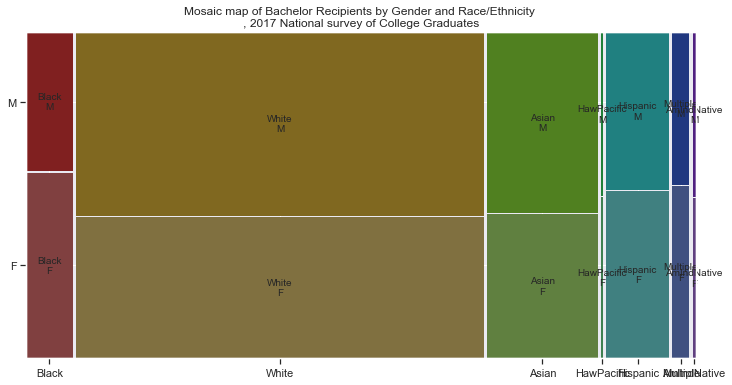

In [78]:
# Mosaic (marimmeko) plot example https://sukhbinder.wordpress.com/2018/09/18/mosaic-plot-in-python/
n, m = 12, 6
fig, ax = plt.subplots(figsize=(n, m))
mosaic(df3, [ 'RaceEthn', 'GENDER'], ax=ax)
plt.title("Mosaic map of Bachelor Recipients by Gender and Race/Ethnicity \n, 2017 National survey of College Graduates")
plt.show()

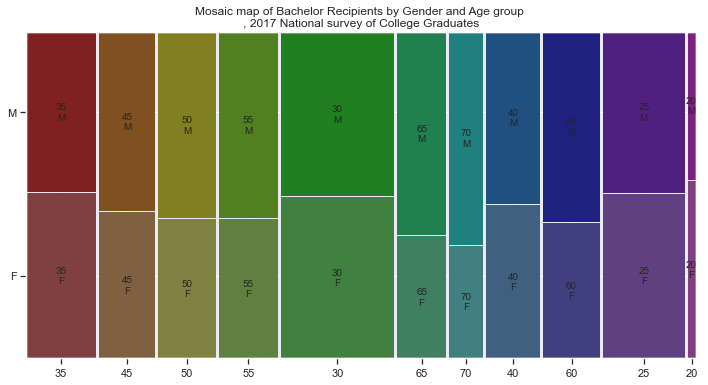

In [79]:
n, m = 12, 6
fig, ax = plt.subplots(figsize=(n, m))
mosaic(df3, [ 'AGEGR', 'GENDER'], ax=ax)
plt.title("Mosaic map of Bachelor Recipients by Gender and Age group \n, 2017 National survey of College Graduates")
plt.show()

In [80]:
dfT = df6[['GENDER', 'RaceEthn', 'Number']]
dfT.head(3)

GENDER     RaceEthn  Number
0      F  AmIndNative       1
1      F  AmIndNative       1
2      F        Asian      10

In [81]:
#df3 = nData3[['AGE','AGEGR', 'BAYR',  'GENDER',  'WRKGP', 'RaceEthn', 'Cntr', 'Continent', 'Value']]
d1 = nData3[[  'GENDER', 'RaceEthn', 'Number']]
d2 = d1.groupby([ 'GENDER', 'RaceEthn'])['Number'].agg('count')
d2.head(100)

d3 = d2.to_frame()

d3.head(10)
#df5.columns
d4 = d3.reset_index()
#df5[['AGEGR', 'GENDER']] = df5.index
d4.head(3)

GENDER     RaceEthn  Number
0      F  AmIndNative     181
1      F        Asian    6315
2      F        Black    3451

#### 3.5) Bar Plot

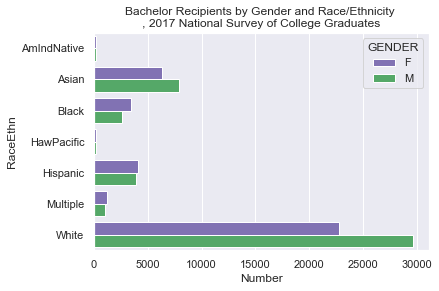

In [82]:
# create plot
chart = sns.barplot(x = 'Number', y = 'RaceEthn', hue = 'GENDER', data = d4,
            palette = ["m", "g"],
           # order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
d4.groupby(['GENDER', 'RaceEthn']).mean()['Number']
d4.groupby(['GENDER', 'RaceEthn']).std()['Number']
chart.set_title("Bachelor Recipients by Gender and Race/Ethnicity \n, 2017 National Survey of College Graduates")
plt.show()

In [83]:
#df3 = nData3[['AGE','AGEGR', 'BAYR',  'GENDER',  'WRKGP', 'RaceEthn', 'Cntr', 'Continent', 'Value']]
d1 = nData3[[ 'GENDER', 'AGEGR','RaceEthn', 'Number']]
d2 = d1.groupby([ 'AGEGR','RaceEthn' ])['Number'].agg('count')
d2.head(100)

d3 = d2.to_frame()

d3.head(10)
#df5.columns
d4 = d3.reset_index()
#df5[['AGEGR', 'GENDER']] = df5.index
d4.head(3)

df5 = d4.pivot("AGEGR", "RaceEthn",  "Number")
# df5.head()

# df5 = d4.pivot("GENDER", "RaceEthn",  "Number")
# df5.head()

In [84]:
r = [0,1,2,3,4,5,6,7,8,9,10]

# From raw value to percentage
#totals = [i+j+k for i,j,k,l,m, n, p in zip(df5['AmIndNative'], df5['Asian'], df5['Black'], df5['HawPacific'], df5['Hispanic'], df5['Multiple'], df5['White'])]
totals = [i+j+k+l+m+n for i,j,k,l,m, n in zip(df5['AmIndNative'], df5['Asian'], df5['Black'], df5['HawPacific'], df5['Hispanic'], df5['Multiple'])]
AmIndNative = [i / j * 100 for i,j in zip(df5['AmIndNative'], totals)]
Asian = [i / j * 100 for i,j in zip( df5['Asian'], totals)]
Black = [i / j * 100 for i,j in zip(df5['Black'], totals)]
HawPacific = [i / j * 100 for i,j in zip(df5['HawPacific'], totals)]
Hispanic = [i / j * 100 for i,j in zip( df5['Hispanic'], totals)]
Multiple = [i / j * 100 for i,j in zip(df5['Multiple'], totals)]
#White = [i / j * 100 for i,j in zip(df5['White'], totals)] 

#### 3.6) Stacked Bar

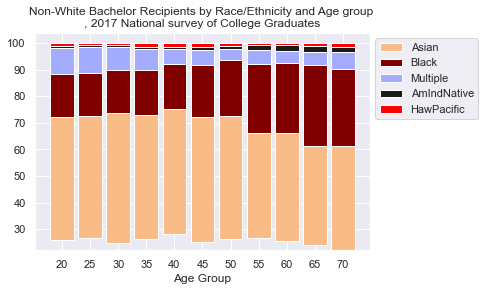

In [85]:
# plot
barWidth = 0.85
names = ('20','25','30','35','40', '45','50','55','60','65', '70')

# Create green Bars
#plt.bar(r, Hispanic, color='b', edgecolor='white', width=barWidth, label="Hispanic")

plt.bar(r, Asian,  bottom = Hispanic, color='#f9bc86', edgecolor='white', width=barWidth, label="Asian")

plt.bar(r, Black,   bottom=[i+j for i,j in zip(Hispanic, Asian)], color='maroon', edgecolor='white', width=barWidth, label="Black")

plt.bar(r, Multiple, bottom=[i+j+k for i,j,k in zip(Hispanic, Asian, Black)], color='#a3acff', edgecolor='white', width=barWidth, label="Multiple")
# Create green Bars
plt.bar(r, AmIndNative, bottom=[i+j+k+l for i,j,k,l in zip(Hispanic, Asian, Black, Multiple)], color='k', edgecolor='white', width=barWidth, label="AmIndNative")
plt.bar(r, HawPacific, bottom=[i+j+k+l+m for i,j,k,l,m in zip(Hispanic, Asian, Black, Multiple,AmIndNative )], color='red', edgecolor='white', width=barWidth, label="HawPacific")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Age Group")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title("Non-White Bachelor Recipients by Race/Ethnicity and Age group \n, 2017 National survey of College Graduates")
# Show graphic
plt.show()


#### 4) Science and Engineering State Profiles
Data Source: https://www.nsf.gov/statistics/states/interactive/show.cfm?stateID=53,33&year=0

In [86]:
nData3.columns
#nData3.head()

Index(['AGE', 'AGEGR', 'ASDGRI', 'ASIAN', 'BAACYR', 'BARGN', 'BAST', 'BAYR',
       'BIRMN', 'BIRYR', 'BLACK', 'BSDGRI', 'BTHRGN', 'CTZUSIN', 'GENDER',
       'HISPANIC', 'NATIVE', 'PACIFIC', 'RACEM', 'RACETHM', 'WHITE', 'WRKGP',
       'RaceEthn', 'LocSch', 'Country', 'Continent', 'Cntr', 'CC', 'ISO2_code',
       'ISO3_code', 'Number'],
      dtype='object')

In [87]:
dg = nData3['ISO3_code'].value_counts()
dg2 = dg.to_frame()
cont = nData3['CC'].value_counts()
cont2 = cont.to_frame()
#type(dg2)
#dg2.head(100)

In [88]:
dg3 = dg2.reset_index()

In [89]:
dg3 = dg3.rename(columns={'ISO3_code': "Number"})
#dg3.head()

####  4.1) Choropleths

In [90]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(dg3,  # Input Pandas DataFrame
                    locations="index",  # DataFrame column with locations
                    color="Number",  # DataFrame column with color values
                    hover_name= "index", # DataFrame column hover info
                    range_color=[1,69366], 
                    color_continuous_scale='RdYlGn') # Set to plot as US States
fig.update_layout(
    title_text = "2017 survey - Location of School Awarding First Bachelor's Degree" , # Create a Title
    geo_scope='world',  # Plot only the USA instead of globe
)
fig.show() 

In [91]:
dg3 = dg3[1:]
#dg3.head(1000)

In [92]:
# fig = px.choropleth(dg3,  # Input Pandas DataFrame
#                     locations="index",  # DataFrame column with locations
#                     color="Number",  # DataFrame column with color values, 
#                     hover_name="index", 
#                     animation_frame="BAYR", 
#                     range_color=[1,2439],  
#                     color_continuous_scale='RdYlGn')
# fig.show()

In [93]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(dg3,  # Input Pandas DataFrame
                    locations="index",  # DataFrame column with locations
                    color="Number",  # DataFrame column with color values
                    hover_name= "index", # DataFrame column hover info
                    range_color=[1,2439], 
                    color_continuous_scale='RdYlGn') # Set to plot as US States
fig.update_layout(
    title_text = "2017 survey - Location of School Awarding First Bachelor's Degree, US Excluded"  , # Create a Title
    geo_scope='world',  # Plot only the USA instead of globe
)
fig.show()  

In [94]:
import pandas as pd
import plotly.express as px  # Be sure to import express

Rank = pd.read_excel('../../Users/muluken/WorkingFiles/NSF_NCSES/Data/GeographicData/Selected_Rank.xlsx')

Rank = Rank.rename(columns={'Gross domestic product, 2018 ($millions)': "GDP Rank",
                          'Total R&D performance, 2017 ($millions)': "Total R&D Rank",
                          'State government R&D expenditures, 2018 ($thousands)': "State GOV R&D Rank" })
Rank.head()

State State_ID Characteristic, data year (unit)  GDP Rank  \
0     Alabama       AL                             Rank        27   
1      Alaska       AK                             Rank        48   
2     Arizona       AZ                             Rank        20   
3    Arkansas       AR                             Rank        35   
4  California       CA                             Rank         1   

   Total R&D Rank  Business R&D performance, 2017 ($millions)  \
0              25                                          28   
1              39                                          34   
2              19                                          17   
3              43                                          40   
4               1                                           1   

   Higher education R&D performance, 2018 ($millions)  \
0                                                 23    
1                                                 46    
2                                                 18    
3                                                 39    
4                                                  1    

   Academic research space, 2017 (thousands sq. ft.)  \
0                                                 29   
1                                                 43   
2                                                 26   
3                                                 37   
4                                                  1   

   Federal R&D obligations, 2018 ($millions)  State GOV R&D Rank  \
0                                          7                22.0   
1                                         40                36.0   
2                                         20                34.0   
3                                         44                28.0   
4                                          2                 1.0   

   Utility patents issued to state residents, 2018  \
0                                               35   
1                                               51   
2                                               18   
3                                               38   
4                                                1   

   Population, 2019 (thousands)  All agencies  
0                            24             7  
1                            49            40  
2                            14            20  
3                            34            44  
4                             1             2

In [95]:
Value = pd.read_excel('../../Users/muluken/WorkingFiles/NSF_NCSES/Data/GeographicData/Selected_Value.xlsx')
Value.head()

State State_ID Characteristic, data year (unit)  \
0     Alabama       AL                            Value   
1      Alaska       AK                            Value   
2     Arizona       AZ                            Value   
3    Arkansas       AR                            Value   
4  California       CA                            Value   

   Gross domestic product, 2018 ($millions)  \
0                                    221126   
1                                     54011   
2                                    346792   
3                                    128082   
4                                   2968118   

   Total R&D performance, 2017 ($millions)  \
0                                     5879   
1                                     1146   
2                                     7826   
3                                      812   
4                                   150552   

  Business R&D performance, 2017 ($millions)  \
0                                       1896   
1                                        912   
2                                       6338   
3                                        466   
4                                     132473   

   Higher education R&D performance, 2018 ($millions)  \
0                                               1003    
1                                                161    
2                                               1285    
3                                                311    
4                                               9780    

   Academic research space, 2017 (thousands sq. ft.)  \
0                                               2723   
1                                                867   
2                                               2887   
3                                               1349   
4                                              24443   

   Federal R&D obligations, 2018 ($millions)  \
0                                     5174.0   
1                                      300.0   
2                                     1737.0   
3                                      206.0   
4                                    17237.0   

   State government R&D expenditures, 2018 ($thousands)  \
0                                            21653.0      
1                                            10812.0      
2                                            12937.0      
3                                            16325.0      
4                                           633061.0      

   Utility patents issued to state residents, 2018  \
0                                              456   
1                                               46   
2                                             2551   
3                                              335   
4                                            39814   

   Population, 2019 (thousands)  All agencies  
0                          4903       5173700  
1                           732        299823  
2                          7279       1736998  
3                          3018        206209  
4                         39512      17236903

In [96]:
 fig = px.choropleth(Value,  # Input Pandas DataFrame
                    locations="State_ID",  # DataFrame column with locations
                    color="Gross domestic product, 2018 ($millions)",  # DataFrame column with color values
                    hover_name="State_ID", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Gross domestic product, 2018 ($millions)', # Create a Title
    geo_scope='north america',  # Plot only the USA instead of globe
)
fig.show() 

In [97]:
 fig = px.choropleth(Rank,  # Input Pandas DataFrame
                    locations="State_ID",  # DataFrame column with locations
                    color="GDP Rank",  # DataFrame column with color values
                    hover_name="State_ID", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings - Gross domestic product, 2018 ($millions)', # Create a Title
    geo_scope='north america',  # Plot only the USA instead of globe
)
fig.show() 

In [98]:
fig = px.choropleth(Value,  # Input Pandas DataFrame
                    locations="State_ID",  # DataFrame column with locations
                    color="Total R&D performance, 2017 ($millions)", hover_name="State", # DataFrame column with color values  
                    color_continuous_scale='BrBG', 
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Total R&D performance, 2017 ($millions)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

In [99]:
fig = px.choropleth(Rank,  # Input Pandas DataFrame
                    locations="State_ID",  # DataFrame column with locations
                    color="Total R&D Rank", hover_name="State", # DataFrame column with color values
                    range_color=[1,52],  
                    color_continuous_scale='Geyser', 
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings - Total R&D performance, 2017 ($millions)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show() 

In [100]:
fig = px.choropleth(Value,  # Input Pandas DataFrame
                    locations="State_ID",  # DataFrame column with locations
                    color="State government R&D expenditures, 2018 ($thousands)", hover_name="State", # DataFrame column with color values  
                    color_continuous_scale='Fall', 
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State government R&D expenditures, 2018 ($thousands)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

In [101]:
fig = px.choropleth(Rank,  # Input Pandas DataFrame
                    locations="State_ID",  # DataFrame column with locations
                    color="State GOV R&D Rank", hover_name="State", # DataFrame column with color values
                    range_color=[1,52],  
                    color_continuous_scale='RdYlGn', 
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings - State government R&D expenditures, 2018 ($thousands)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show() 

In [102]:
nData3.head(3)
nData3.columns
dint = nData3.groupby([ 'GENDER', 'BAYR', 'Cntr',  'ISO2_code', 'ISO3_code'])['Number'].agg('count')
dint= dint.reset_index()
# dint.shape
dint = dint.rename(columns={'BAYR': "Year"})
# dint2 = dint[dint.Cntr != 'United States']
# dint3 = dint2[dint.Cntr != 'India']
dint.head(5)

GENDER  Year           Cntr ISO2_code ISO3_code  Number
0      F  1959  United States        US       USA       1
1      F  1960    South Korea        KR       KOR       1
2      F  1960  United States        US       USA       1
3      F  1961          India        IN       IND       1
4      F  1961  United States        US       USA       1

#### 4.2) Animated Choropleth by Year

In [103]:

fig = px.choropleth(dint, locations="ISO3_code", 
                    color="Number", hover_name="Cntr", 
                    animation_frame="Year", 
                    range_color=[0,16],  
                    color_continuous_scale='RdYlGn')
fig.update_layout(
    title_text = 'Surveyed Graduates by Country of Origin and Year of Degree Awarded', # Create a Title
    geo_scope='world',  # Plot only the USA instead of globe 
)
fig.show()

In [104]:
# import plotly.express as px
# gapminder = px.data.gapminder()
# gapminder.head(10000)

# fig = px.choropleth(gapminder, locations="iso_alpha", 
#                     color="lifeExp", hover_name="country", 
#                     animation_frame="year", 
#                     range_color=[20,80],  
#                     color_continuous_scale='RdYlGn')
# fig.show()